In [1]:

%load_ext autoreload
%autoreload 2

import jax.numpy as jnp
import jax
import matplotlib.pyplot as plt
import pymudokon as pm

jax.config.update('jax_platform_name', 'cpu')


In [2]:
carry, accumulate = pm.simple_shear_wrapper(
    pm.DruckerPrager,
    [5e8, 0.2, jnp.deg2rad(15), jnp.deg2rad(15), 0.0, 5e7, 0, -1000.0 * jnp.eye(3).reshape(1, 3, 3)],
    target=0.5,
    dt=1e-3,
)
material_stack, volume_fraction_stack, stress_stack, strain_rate_stack = accumulate

fig_ax_stack = pm.plot_suite(
    "./output/dp_ss_friction_angle_",
    strain_rate_stack,
    stress_stack,
    volume_fraction_stack,
    material_stack,
    )

/home/retief/Projects/PyMudokonMPM/pymudokon/materials/druckerprager.py:107: UserWarning: Warning: The following functions should be implemented in the future:
(1) update stress in MPM. (2) return mapping to apex
  warnings.warn(  # noqa: B028


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

/home/retief/Projects/PyMudokonMPM/pymudokon/materials/druckerprager.py:107: UserWarning: Warning: The following functions should be implemented in the future:
(1) update stress in MPM. (2) return mapping to apex
  warnings.warn(  # noqa: B028


(-200.0, 1000.0)

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

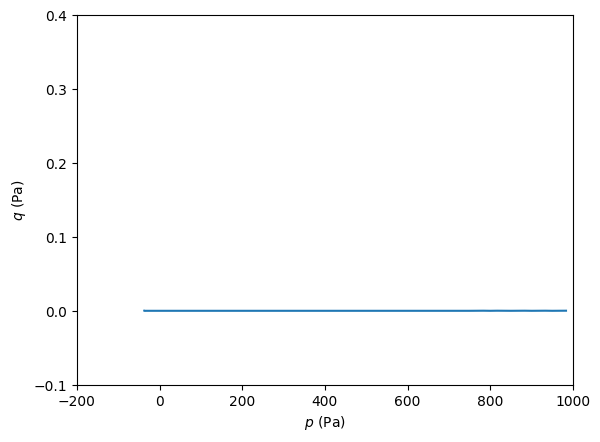

In [10]:

# Isotropic decompression, test return mapping to apex
carry, accumulate = pm.isotropic_compression_wrapper(
    pm.DruckerPrager,
    [5e8, 0.2, jnp.deg2rad(15), jnp.deg2rad(15), 10, 1.0, 0, -1000.0 * jnp.eye(3).reshape(1, 3, 3)],
    target=-0.5,
    dt=1e-3,
)

material_stack, volume_fraction_stack, stress_stack, strain_rate_stack = accumulate

fig_ax_stack = pm.plot_suite(
    "./output/dp_ss_friction_angle_",
    strain_rate_stack,
    stress_stack,
    volume_fraction_stack,
    material_stack,
    )

fig,ax = pm.plot_q_p(
    stress_stack=stress_stack,
    normalize_stress=1,
)

ax.set_ylim([-0.1, 0.4])

ax.set_xlim([-200, 1000])

In [6]:
stress_stack

Array([[[-983.3333  ,    0.      ,    0.      ],
        [   0.      , -983.3333  ,    0.      ],
        [   0.      ,    0.      , -983.3333  ]],

       [[-966.6667  ,    0.      ,    0.      ],
        [   0.      , -966.6667  ,    0.      ],
        [   0.      ,    0.      , -966.6667  ]],

       [[-950.      ,    0.      ,    0.      ],
        [   0.      , -950.      ,    0.      ],
        [   0.      ,    0.      , -950.      ]],

       ...,

       [[   3.725236,    0.      ,    0.      ],
        [   0.      ,    3.725236,    0.      ],
        [   0.      ,    0.      ,    3.725236]],

       [[   3.725236,    0.      ,    0.      ],
        [   0.      ,    3.725236,    0.      ],
        [   0.      ,    0.      ,    3.725236]],

       [[   3.725236,    0.      ,    0.      ],
        [   0.      ,    3.725236,    0.      ],
        [   0.      ,    0.      ,    3.725236]]], dtype=float32)